# Wavelets Denoising

The denoising steps are the following :

*   Apply the dwt to the signal
*   Compute the threshold corresponding to the chosen level
*   Only keep coefficients with a value higher than the threshold
*   Apply the inverse dwt to retrieve the signal




## Imports

In [2]:
# Mount drive
from google.colab import drive
drive.mount('gdrive')

Mounted at gdrive


In [25]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pywt
import sys

In [11]:
cd /content/gdrive/Othercomputers/My_Laptop/AI_DataScience_Training/AI_Healthcare/AI_Healthcare/ecg-processing/Signal_Denoising

/content/gdrive/Othercomputers/My_Laptop/AI_DataScience_Training/AI_Healthcare/AI_Healthcare/ecg-processing/Signal_Denoising


In [12]:
def madev(d, axis=None):
    """ Mean absolute deviation of a signal """
    return np.mean(np.absolute(d - np.mean(d, axis)), axis)

In [13]:
def wavelet_denoising(x, wavelet='db4', level=1):
    coeff = pywt.wavedec(x, wavelet, mode="per")
    sigma = (1/0.6745) * madev(coeff[-level])
    uthresh = sigma * np.sqrt(2 * np.log(len(x)))
    coeff[1:] = (pywt.threshold(i, value=uthresh, mode='hard') for i in coeff[1:])
    return pywt.waverec(coeff, wavelet, mode='per')

In [14]:
    def dwt(Frame):
        coeffs = pywt.wavedec(Frame, 'db3', level=2,mode='cpd')
        cA2, cD2, cD1 = coeffs 
        level =2
        Ea = np.matrix(cA2)*np.matrix.transpose(np.matrix(cA2))
        
        k=0
        cD=[cD1, cD2]
        Ed = pd.Series(1.0)
        while k<level:
             Ed[k] = (np.matrix(cD[k])*np.matrix.transpose(np.matrix(cD[k])))
            
             k=k+1

        return Ea,Ed   

In [19]:
ecgDF = pd.read_csv('ecg.csv')
ecgDF.head()

,Time (s),Channel 1 (V)
0,-1.12925,-0.015717
1,-1.12900,-0.013341
2,-1.12875,-0.015038
3,-1.12850,-0.012662
4,-1.12825,-0.015378


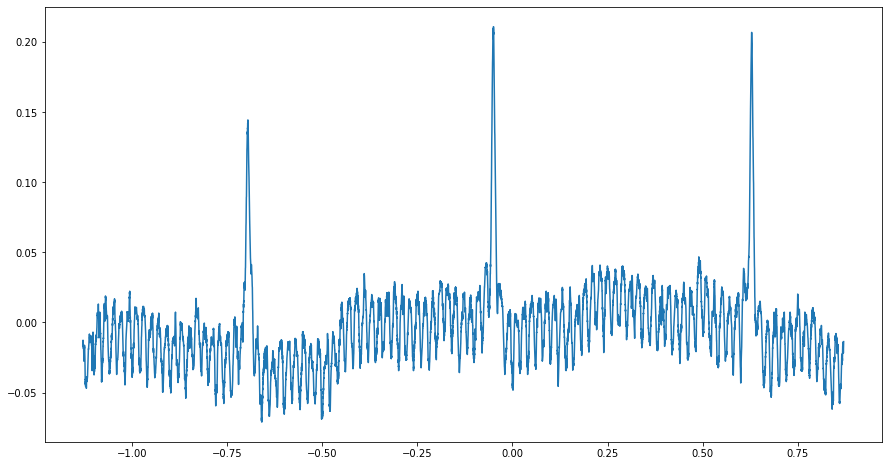

In [22]:
# Time Domain Signal
matplotlib.rc('figure', figsize=(15, 8))
plt.plot(ecgDF['Time (s)'],ecgDF['Channel 1 (V)'])

In [28]:
n_times = 4000
time = ecgDF['Time (s)'][:n_times].values
signal = ecgDF['Channel 1 (V)'][:n_times].values

In [8]:
pywt.wavelist()

['bior1.1',
 'bior1.3',
 'bior1.5',
 'bior2.2',
 'bior2.4',
 'bior2.6',
 'bior2.8',
 'bior3.1',
 'bior3.3',
 'bior3.5',
 'bior3.7',
 'bior3.9',
 'bior4.4',
 'bior5.5',
 'bior6.8',
 'cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'coif1',
 'coif2',
 'coif3',
 'coif4',
 'coif5',
 'coif6',
 'coif7',
 'coif8',
 'coif9',
 'coif10',
 'coif11',
 'coif12',
 'coif13',
 'coif14',
 'coif15',
 'coif16',
 'coif17',
 'db1',
 'db2',
 'db3',
 'db4',
 'db5',
 'db6',
 'db7',
 'db8',
 'db9',
 'db10',
 'db11',
 'db12',
 'db13',
 'db14',
 'db15',
 'db16',
 'db17',
 'db18',
 'db19',
 'db20',
 'db21',
 'db22',
 'db23',
 'db24',
 'db25',
 'db26',
 'db27',
 'db28',
 'db29',
 'db30',
 'db31',
 'db32',
 'db33',
 'db34',
 'db35',
 'db36',
 'db37',
 'db38',
 'dmey',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'haar',
 'mexh',
 'morl',
 'rbio1.1',
 'rbio1.3',
 'rbio1.5',
 'rbio2.2',
 'rbio2.4',
 'rbio2.6',
 'rbio2.8',
 'rbio3.1',

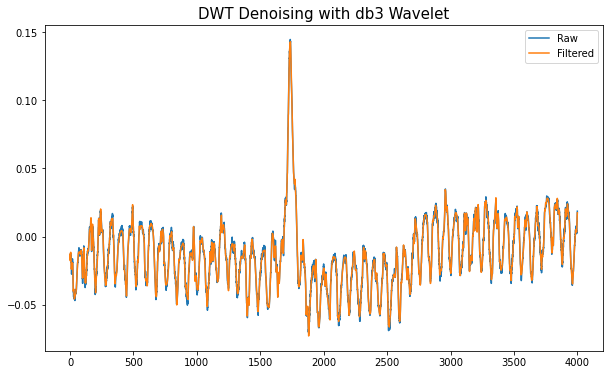

In [29]:
  wav = 'db3'
  filtered = wavelet_denoising(signal, wavelet=wav, level=1) 
  plt.figure(figsize=(10, 6))
  plt.plot(signal, label='Raw')
  plt.plot(filtered, label='Filtered')
  plt.legend()
  plt.title(f"DWT Denoising with {wav} Wavelet", size=15)
  plt.show()

In [12]:
# Data format:
# Raw data should be in a .txt file with two columns, separated by tabs:
#  - The first column should be a time-series index
#  - The second column should contain the data to be filtered

# Get data:
# file_object  = open('/content/gdrive/Othercomputers/My_Laptop/AI_DataScience_Training/AI_Healthcare/AI_Healthcare/ecg-processing/Signal_Denoising/ecg.txt', 'r')
# raw_data = file_object.readlines()
# index = []
# data = []
# for i in range(len(raw_data)-1):
#     x, y = raw_data[i].split('\t')
#     X = float(x)
#     Y = float(y)
#     index.append(X)
#     data.append(Y)
import pandas as pd
ecg_data = pd.read_csv('/content/gdrive/Othercomputers/My_Laptop/AI_DataScience_Training/AI_Healthcare/AI_Healthcare/ecg-processing/Signal_Denoising/ecg .csv',header=None)
# Create wavelet object and define parameters


In [13]:
ecg_data

,0
0,2044
1,2044
2,2044
3,2044
4,2044
...,...
14995,2050
14996,2045
14997,2044
14998,2045


maximum level is 11


/usr/local/lib/python3.7/dist-packages/pywt/_multilevel.py:45: UserWarning: Level value of 11 is too high: all coefficients will experience boundary effects.
  "boundary effects.").format(level))


ValueError: ignored

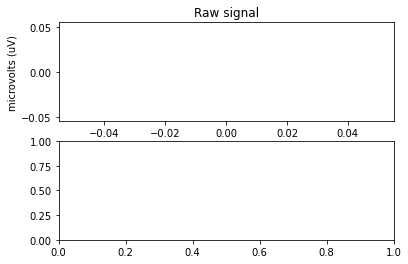

In [16]:
w = pywt.Wavelet('sym4')
maxlev = pywt.dwt_max_level(len(ecg_data), w.dec_len)
# maxlev = 2 # Override if desired
print("maximum level is " + str(maxlev))
threshold = 0.04 # Threshold for filtering

# Decompose into wavelet components, to the level selected:
coeffs = pywt.wavedec(ecg_data, 'sym4', level=maxlev)

#cA = pywt.threshold(cA, threshold*max(cA))
# plt.figure()
# for i in range(1, len(coeffs)):
#     plt.subplot(maxlev, 1, i)
#     plt.plot(coeffs[i])
#     coeffs[i] = pywt.threshold(coeffs[i], threshold*max(coeffs[i]))
#     plt.plot(coeffs[i])


datarec = pywt.waverec(coeffs, 'sym4')


mintime = 1000
maxtime = mintime + 2000

plt.figure()
plt.subplot(2, 1, 1)
plt.plot(index[mintime:maxtime], data[mintime:maxtime])
plt.xlabel('time (s)')
plt.ylabel('microvolts (uV)')
plt.title("Raw signal")
plt.subplot(2, 1, 2)
plt.plot(index[mintime:maxtime], datarec[mintime:maxtime])
plt.xlabel('time (s)')
plt.ylabel('microvolts (uV)')
plt.title("De-noised signal using wavelet techniques")

plt.tight_layout()
plt.show()

# fs = 500
# f, t, Sxx = signal.spectrogram(data, fs)
# plt.pcolormesh(t, f, Sxx)
# plt.ylabel('Frequency [Hz]')
# plt.xlabel('Time [sec]')
# plt.ylim(0, 50)
# plt.show()

